In [43]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
pd.set_option('display.max_rows', 60)
# pd.set_option('precision', 5)
pd.set_option('display.float_format', lambda x: "{:,.4f}".format(x))
pd.set_option('display.max_columns', 100)

In [51]:
sirenas = pd.read_csv("PRUEBA_TECNICA/datasets/sirenas_endemicas_y_sirenas_migrantes_historico.csv")
sirenas_clasif = pd.read_csv("PRUEBA_TECNICA/datasets/sirenas_endemicas_y_sirenas_migrantes.csv")

In [52]:
sirenas.especie.unique() # [1, 0]

array(['sirena_migrante', 'sirena_endemica'], dtype=object)

In [53]:
dic_sirenas = {1:'sirena_migrante',0:'sirena_endemica'}

In [54]:
#sirenas.especie = sirenas.especie.map(dic_sirenas)

In [55]:
sirenas.especie = sirenas.especie.astype("category").cat.codes

In [56]:
sirenas.head(2)

,v1,v2,v3,v4,especie
0,4.3000,3.0000,1.1000,0.1000,1
1,4.8000,3.0000,1.4000,0.1000,1


In [57]:
sirenas.tail(2)

,v1,v2,v3,v4,especie
98,6.3000,3.3000,6.0000,2.5000,0
99,7.2000,3.6000,6.1000,2.5000,0


In [58]:
sirenas.especie.unique()

array([1, 0], dtype=int8)

In [59]:
sirenas.shape

(100, 5)

True

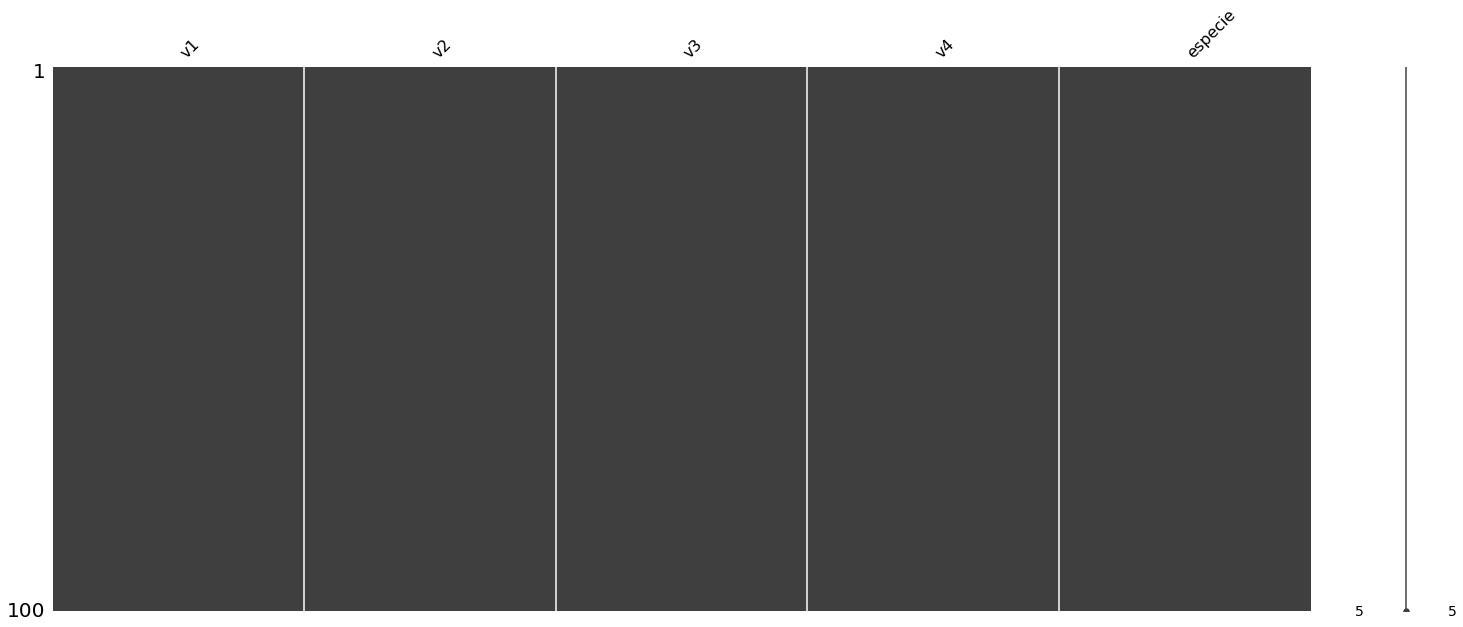

In [61]:
msno.matrix(sirenas)
any(sirenas.duplicated())

In [62]:
sirenas.drop_duplicates(inplace=True)

In [63]:
any(sirenas.duplicated())

False

In [64]:
sirenas.shape

(97, 5)

In [65]:
for i in sirenas.columns:
    sirenas[i].iplot(kind='box')

In [66]:
X = sirenas[[x for x in sirenas.columns if x!='especie']].copy()
y = sirenas[['especie']].copy()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [73]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())
display(logreg.score(X_train, y_train))
display(logreg.score(X_test, y_test))
display(roc_auc_score(y_test, logreg.predict(X_test)))
ls_res = cross_val_score(estimator=logreg, cv = 4, scoring="roc_auc", X = X_train, y = y_train, n_jobs=-1)
np.mean(ls_res), np.std(ls_res)

1.0

1.0

1.0

(1.0, 0.0)

In [74]:
# Save 1
with open('logisticR.sav', 'wb') as f:
	pickle.dump(logreg, f)

In [69]:
logreg = RandomForestClassifier()
logreg.fit(X_train, y_train.values.ravel())
display(logreg.score(X_train, y_train))
display(logreg.score(X_test, y_test))
display(roc_auc_score(y_test, logreg.predict(X_test)))
ls_res = cross_val_score(estimator=logreg, cv = 4, scoring="roc_auc", X = X_train, y = y_train, n_jobs=-1)
np.mean(ls_res), np.std(ls_res)

1.0

1.0

1.0

(1.0, 0.0)

'Accuracy de 100.00%'

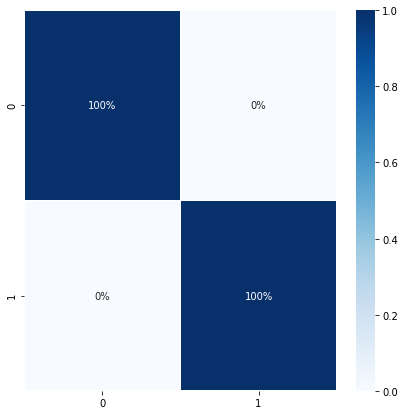

In [70]:
cm = pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = logreg.predict(X_test)))
display('Accuracy de {:.2%}'.format(np.asarray(cm).trace()/len(y_test)))
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(pd.DataFrame([cm[col]/cm[col].sum() for col in cm.columns]),annot=True,fmt='.0%',cmap='Blues',linewidths=0.5,ax=ax)

# Predicción

In [71]:
sirenas_clasif.shape

(39, 5)

In [77]:
sirenas_clasif.head(2).columns

Index(['v1', 'v2', 'v3', 'v4', 'especie'], dtype='object')

In [75]:
# Load 1
with open('logisticR.sav', 'rb') as f:
	model = pickle.load(f)

In [80]:
class Sirenas:
    def __init__(self, df):
        self.df = df.copy()
        with open('logisticR.sav', 'rb') as f:
            self.model = pickle.load(f)
    def predict(self):
        return self.model.predict(self.df[['v1', 'v2', 'v3', 'v4']])

In [81]:
model = Sirenas(sirenas_clasif)
sirenas_clasif['especie'] = model.predict()

In [82]:
sirenas_clasif.head(2)

,v1,v2,v3,v4,especie
0,6.6000,2.3000,4.1000,1.5000,0
1,4.5000,2.9000,2.4000,1.6000,1
